In [2264]:
import pandas as pd
import numpy as np

In [2265]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2266]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [2267]:
combined = pd.concat([train,test])

In [2268]:
combined.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


In [2269]:
combined.tail()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
413,NaN,NaN,S,8.0500,"Spector, Mr. Woolf",0,1305,3,male,0,NaN,A.5. 3236
414,39.0,C105,C,108.9000,"Oliva y Ocana, Dona. Fermina",0,1306,1,female,0,NaN,PC 17758
415,38.5,NaN,S,7.2500,"Saether, Mr. Simon Sivertsen",0,1307,3,male,0,NaN,SOTON/O.Q. 3101262
416,NaN,NaN,S,8.0500,"Ware, Mr. Frederick",0,1308,3,male,0,NaN,359309
417,NaN,NaN,C,22.3583,"Peter, Master. Michael J",1,1309,3,male,1,NaN,2668


In [2270]:
combined.isnull().sum()

Age             263
Cabin          1014
Embarked          2
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
dtype: int64

# Lets Impute Missing values first

# Age

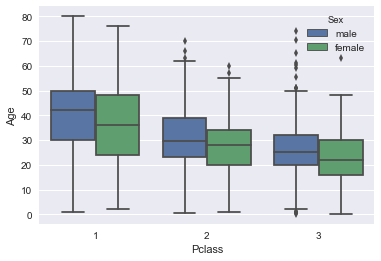

In [2271]:
sns.boxplot(y = 'Age' , x = 'Pclass'  , data = combined ,hue ='Sex')

In [2272]:
combined[(combined['Pclass'] ==1) & (combined['Sex'] == 'male')]['Age'].median()


42.0

In [2273]:
combined[(combined['Pclass'] ==1) & (combined['Sex'] == 'female')]['Age'].median()

36.0

In [2274]:
combined[(combined['Pclass'] ==2) & (combined['Sex'] == 'male')]['Age'].median()

29.5

In [2275]:
combined[(combined['Pclass'] ==2) & (combined['Sex'] == 'female')]['Age'].median()

28.0

In [2276]:
combined[(combined['Pclass'] ==3) & (combined['Sex'] == 'male')]['Age'].median()

25.0

In [2277]:
combined[(combined['Pclass'] ==3) & (combined['Sex'] == 'female')]['Age'].median()

22.0

In [2278]:
def fill_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    Sex = cols[2]
    
    if pd.isnull(Age):
        if (Pclass == 1) & (Sex == 'male'):
            return 42
        elif (Pclass == 1) & (Sex == 'female'):
            return 36
        elif (Pclass == 2) & (Sex == 'male'):
            return 29.5
        elif (Pclass == 2) & (Sex == 'female'):
            return 28
        elif (Pclass == 3) & (Sex == 'male'):
            return 25
        else:
            return 22
    else:
        return Age

In [2279]:
combined['Age'] = combined[['Age','Pclass','Sex']].apply(fill_age,axis=1)

In [2280]:
combined.isnull().sum()

Age               0
Cabin          1014
Embarked          2
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
dtype: int64

# Lets change Cabin to Deck

In [2281]:
combined['Deck'] = combined['Cabin'].str[0]

In [2282]:
combined['Deck'].fillna(value = 'X', inplace = True)

In [2283]:
combined.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Deck
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,X
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,C
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,X
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,C
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,X


In [2284]:
combined.drop('Cabin', axis=1 , inplace = True)

In [2285]:
combined.head()

,Age,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Deck
0,22.0,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,X
1,38.0,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,C
2,26.0,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,X
3,35.0,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,C
4,35.0,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,X


How people survived with respect to deck on the ship

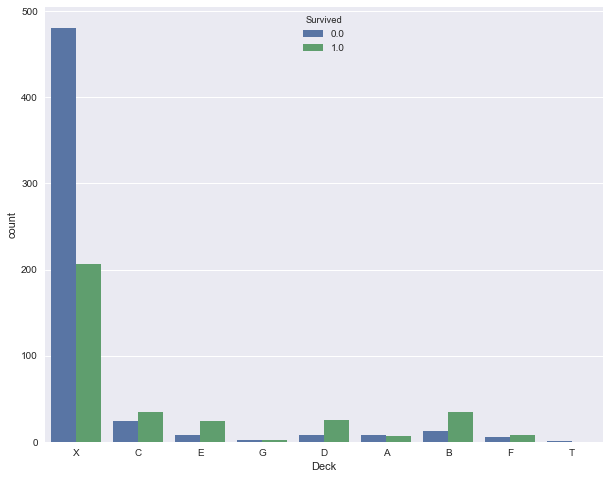

In [2286]:
plt.figure(figsize=(10,8))
sns.countplot(x='Deck',data=combined,hue='Survived')

# Embarked

In [2287]:
combined[combined['Embarked'].isnull() == True ]

,Age,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Deck
61,38.0,NaN,80.0,"Icard, Miss. Amelie",0,62,1,female,0,1.0,113572,B
829,62.0,NaN,80.0,"Stone, Mrs. George Nelson (Martha Evelyn)",0,830,1,female,0,1.0,113572,B


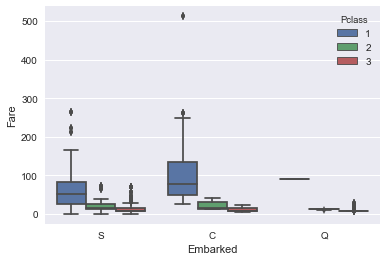

In [2288]:
sns.boxplot(x='Embarked', y= 'Fare', hue='Pclass', data=combined)

As both the fares for missing rows are 80 we can replace NaN values for Embarked with C 

In [2289]:
combined['Embarked'].fillna(value = 'C' , inplace = True)

In [2290]:
combined.isnull().sum()

Age              0
Embarked         0
Fare             1
Name             0
Parch            0
PassengerId      0
Pclass           0
Sex              0
SibSp            0
Survived       418
Ticket           0
Deck             0
dtype: int64

# Fare

In [2291]:
combined[combined['Fare'].isnull() == True]

,Age,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Deck
152,60.5,S,NaN,"Storey, Mr. Thomas",0,1044,3,male,0,NaN,3701,X


In [2292]:
combined[(combined['Embarked'] == 'S') & (combined['Pclass'] == 3)]['Fare'].median()

8.05

we can replace the missing value in fare with the above

In [2293]:
combined['Fare'].fillna(value = 8.05 , inplace = True)

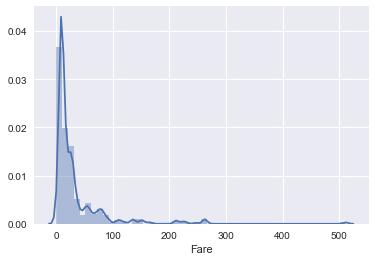

In [2294]:
sns.distplot(combined['Fare'])

In [2295]:
combined.isnull().sum()

Age              0
Embarked         0
Fare             0
Name             0
Parch            0
PassengerId      0
Pclass           0
Sex              0
SibSp            0
Survived       418
Ticket           0
Deck             0
dtype: int64

We do not have any missing values expect the 418 in the testing set

# Feature Engineering

# Name Length

In [2296]:
combined["NameLength"] = combined["Name"].apply(lambda x: len(x))

In [2297]:
combined["NameLength"].corr(combined["Survived"])

0.3323495344232763

In [2298]:
bins = [0, 25, 50, 75, 100]

In [2299]:
group_names = ['Short', 'Okay', 'Good', 'Long']

In [2300]:
combined['Name_Type'] = pd.cut(combined['NameLength'], bins, labels=group_names)

In [2301]:
combined.head()

,Age,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Deck,NameLength,Name_Type
0,22.0,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,X,23,Short
1,38.0,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,C,51,Good
2,26.0,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,X,22,Short
3,35.0,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,C,44,Okay
4,35.0,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,X,24,Short


# Family Size

In [2302]:
combined['Family_size'] = combined['Parch'] + combined['SibSp'] + 1

In [2303]:
combined.head()

,Age,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Deck,NameLength,Name_Type,Family_size
0,22.0,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,X,23,Short,2
1,38.0,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,C,51,Good,2
2,26.0,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,X,22,Short,1
3,35.0,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,C,44,Okay,2
4,35.0,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,X,24,Short,1


# Title

In [2304]:
combined['Title'] = combined['Name'].str.split(',', expand=True)[1].str.split('.', expand = True)[0]

In [2305]:
combined.drop('Name' , axis = 1 , inplace = True)

In [2306]:
combined['Title'].value_counts()

 Mr              757
 Miss            260
 Mrs             197
 Master           61
 Rev               8
 Dr                8
 Col               4
 Ms                2
 Major             2
 Mlle              2
 Mme               1
 Capt              1
 Jonkheer          1
 Lady              1
 Dona              1
 the Countess      1
 Sir               1
 Don               1
Name: Title, dtype: int64

In [2307]:
combined['Title'].unique()

array([' Mr', ' Mrs', ' Miss', ' Master', ' Don', ' Rev', ' Dr', ' Mme',
       ' Ms', ' Major', ' Lady', ' Sir', ' Mlle', ' Col', ' Capt',
       ' the Countess', ' Jonkheer', ' Dona'], dtype=object)

In [2308]:
combined['Title'].replace([' Don', ' Rev',' Dr', ' Major', ' Lady', ' Sir', ' Col', ' Capt',' the Countess', ' Jonkheer', ' Dona'], 'Rare' , inplace = True)

In [2309]:
combined['Title'].replace([' Mme',' Ms',' Mlle',], ' Miss' , inplace = True)

In [2310]:
combined['Title'].value_counts()

 Mr        757
 Miss      265
 Mrs       197
 Master     61
Rare        29
Name: Title, dtype: int64

# Ticket column

In [2311]:
combined['Ttype'] = combined['Ticket'].str[0]

In [2312]:
combined['Ttype'].unique()

array(['A', 'P', 'S', '1', '3', '2', 'C', '7', 'W', '4', 'F', 'L', '9',
       '6', '5', '8'], dtype=object)

In [2313]:
combined['Ttype'].replace( ['1','3','2','7','4','9','6', '5','8'], 'X' , inplace=True)

In [2314]:
combined.head()

,Age,Embarked,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Deck,NameLength,Name_Type,Family_size,Title,Ttype
0,22.0,S,7.2500,0,1,3,male,1,0.0,A/5 21171,X,23,Short,2,Mr,A
1,38.0,C,71.2833,0,2,1,female,1,1.0,PC 17599,C,51,Good,2,Mrs,P
2,26.0,S,7.9250,0,3,3,female,0,1.0,STON/O2. 3101282,X,22,Short,1,Miss,S
3,35.0,S,53.1000,0,4,1,female,1,1.0,113803,C,44,Okay,2,Mrs,X
4,35.0,S,8.0500,0,5,3,male,0,0.0,373450,X,24,Short,1,Mr,X


# Child or not

In [2315]:
combined['IsChild'] = combined['Age'] < 10

In [2316]:
combined['IsChild'].replace([False,True], [0,1] , inplace = True)

In [2317]:
combined.head()

,Age,Embarked,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Deck,NameLength,Name_Type,Family_size,Title,Ttype,IsChild
0,22.0,S,7.2500,0,1,3,male,1,0.0,A/5 21171,X,23,Short,2,Mr,A,0
1,38.0,C,71.2833,0,2,1,female,1,1.0,PC 17599,C,51,Good,2,Mrs,P,0
2,26.0,S,7.9250,0,3,3,female,0,1.0,STON/O2. 3101282,X,22,Short,1,Miss,S,0
3,35.0,S,53.1000,0,4,1,female,1,1.0,113803,C,44,Okay,2,Mrs,X,0
4,35.0,S,8.0500,0,5,3,male,0,0.0,373450,X,24,Short,1,Mr,X,0


# Alone or not

In [2318]:
combined['IsAlone'] = (combined['Parch'] + combined['SibSp']) == 0

In [2319]:
combined['IsAlone'].replace([False,True], [0,1] , inplace = True)

In [2320]:
combined.head()

,Age,Embarked,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Deck,NameLength,Name_Type,Family_size,Title,Ttype,IsChild,IsAlone
0,22.0,S,7.2500,0,1,3,male,1,0.0,A/5 21171,X,23,Short,2,Mr,A,0,0
1,38.0,C,71.2833,0,2,1,female,1,1.0,PC 17599,C,51,Good,2,Mrs,P,0,0
2,26.0,S,7.9250,0,3,3,female,0,1.0,STON/O2. 3101282,X,22,Short,1,Miss,S,0,1
3,35.0,S,53.1000,0,4,1,female,1,1.0,113803,C,44,Okay,2,Mrs,X,0,0
4,35.0,S,8.0500,0,5,3,male,0,0.0,373450,X,24,Short,1,Mr,X,0,1


In [2321]:
combined['IsAlone'].replace([False,True], [0,1] , inplace = True)

# Young Woman or not

In [2322]:
combined['Young_Woman'] = (combined['Sex'] == 'female') & (combined['Age'] < 40) & (combined['Age'] > 10)

In [2323]:
combined['Young_Woman'].replace([False,True], [0,1] , inplace = True)

In [2324]:
combined.head()

,Age,Embarked,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Deck,NameLength,Name_Type,Family_size,Title,Ttype,IsChild,IsAlone,Young_Woman
0,22.0,S,7.2500,0,1,3,male,1,0.0,A/5 21171,X,23,Short,2,Mr,A,0,0,0
1,38.0,C,71.2833,0,2,1,female,1,1.0,PC 17599,C,51,Good,2,Mrs,P,0,0,1
2,26.0,S,7.9250,0,3,3,female,0,1.0,STON/O2. 3101282,X,22,Short,1,Miss,S,0,1,1
3,35.0,S,53.1000,0,4,1,female,1,1.0,113803,C,44,Okay,2,Mrs,X,0,0,1
4,35.0,S,8.0500,0,5,3,male,0,0.0,373450,X,24,Short,1,Mr,X,0,1,0


# Is Rich or not

In [2325]:
combined['Is_Rich'] = (combined['Pclass'] == 1) & (combined['Fare'] >100)

In [2326]:
combined['Is_Rich'].replace([False,True], [0,1] , inplace = True)

In [2327]:
combined.head()

,Age,Embarked,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Deck,NameLength,Name_Type,Family_size,Title,Ttype,IsChild,IsAlone,Young_Woman,Is_Rich
0,22.0,S,7.2500,0,1,3,male,1,0.0,A/5 21171,X,23,Short,2,Mr,A,0,0,0,0
1,38.0,C,71.2833,0,2,1,female,1,1.0,PC 17599,C,51,Good,2,Mrs,P,0,0,1,0
2,26.0,S,7.9250,0,3,3,female,0,1.0,STON/O2. 3101282,X,22,Short,1,Miss,S,0,1,1,0
3,35.0,S,53.1000,0,4,1,female,1,1.0,113803,C,44,Okay,2,Mrs,X,0,0,1,0
4,35.0,S,8.0500,0,5,3,male,0,0.0,373450,X,24,Short,1,Mr,X,0,1,0,0


# Feature Scaling

In [2328]:
from sklearn import preprocessing

std_scale = preprocessing.StandardScaler().fit(combined[['Age', 'Fare' ]])
combined[['Age', 'Fare']] = std_scale.transform(combined[['Age', 'Fare']])


In [2329]:
combined.head()

,Age,Embarked,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Deck,NameLength,Name_Type,Family_size,Title,Ttype,IsChild,IsAlone,Young_Woman,Is_Rich
0,-0.549555,S,-0.503176,0,1,3,male,1,0.0,A/5 21171,X,23,Short,2,Mr,A,0,0,0,0
1,0.661353,C,0.734809,0,2,1,female,1,1.0,PC 17599,C,51,Good,2,Mrs,P,0,0,1,0
2,-0.246828,S,-0.490126,0,3,3,female,0,1.0,STON/O2. 3101282,X,22,Short,1,Miss,S,0,1,1,0
3,0.434307,S,0.383263,0,4,1,female,1,1.0,113803,C,44,Okay,2,Mrs,X,0,0,1,0
4,0.434307,S,-0.487709,0,5,3,male,0,0.0,373450,X,24,Short,1,Mr,X,0,1,0,0


# Converting Categorical variables

In [2330]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

labelEnc=LabelEncoder()

cat_vars=['Embarked','Sex',"Title","Family_size",'Deck','Ttype','Name_Type']
for col in cat_vars:
    combined[col]=labelEnc.fit_transform(combined[col])

combined.head()

,Age,Embarked,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Deck,NameLength,Name_Type,Family_size,Title,Ttype,IsChild,IsAlone,Young_Woman,Is_Rich
0,-0.549555,2,-0.503176,0,1,3,1,1,0.0,A/5 21171,8,23,3,1,2,0,0,0,0,0
1,0.661353,0,0.734809,0,2,1,0,1,1.0,PC 17599,2,51,0,1,3,4,0,0,1,0
2,-0.246828,2,-0.490126,0,3,3,0,0,1.0,STON/O2. 3101282,8,22,3,0,1,5,0,1,1,0
3,0.434307,2,0.383263,0,4,1,0,1,1.0,113803,2,44,2,1,3,7,0,0,1,0
4,0.434307,2,-0.487709,0,5,3,1,0,0.0,373450,8,24,3,0,2,7,0,1,0,0


In [2331]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 20 columns):
Age            1309 non-null float64
Embarked       1309 non-null int64
Fare           1309 non-null float64
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null int64
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
Deck           1309 non-null int64
NameLength     1309 non-null int64
Name_Type      1309 non-null int64
Family_size    1309 non-null int64
Title          1309 non-null int64
Ttype          1309 non-null int64
IsChild        1309 non-null int64
IsAlone        1309 non-null int64
Young_Woman    1309 non-null int64
Is_Rich        1309 non-null int64
dtypes: float64(3), int64(16), object(1)
memory usage: 254.8+ KB


In [2332]:
plt.figure(figsize=(15,10))
combined.corr()["Survived"]

Age           -0.058635
Embarked      -0.174199
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
Pclass        -0.338481
Sex           -0.543351
SibSp         -0.035322
Survived       1.000000
Deck          -0.301116
NameLength     0.332350
Name_Type     -0.251589
Family_size    0.025616
Title         -0.074812
Ttype          0.037446
IsChild        0.128812
IsAlone       -0.203367
Young_Woman    0.444153
Is_Rich        0.182033
Name: Survived, dtype: float64

# Dividing Dataset

In [2333]:
New_Train = combined[:891]
X_train = New_Train.drop('Survived',axis=1)
y_train = New_Train['Survived']

In [2334]:
X_train.columns

Index(['Age', 'Embarked', 'Fare', 'Parch', 'PassengerId', 'Pclass', 'Sex',
       'SibSp', 'Ticket', 'Deck', 'NameLength', 'Name_Type', 'Family_size',
       'Title', 'Ttype', 'IsChild', 'IsAlone', 'Young_Woman', 'Is_Rich'],
      dtype='object')

In [2335]:
New_Test = combined[891:]
X_test = New_Test.drop('Survived',axis=1)

In [2336]:
y_train.isnull().any()

False

# Modelling

# Random Forest Model

In [2341]:
predictors = ['Age', 'Embarked', 'Fare', 'Parch', 'PassengerId', 'Pclass', 'Sex',
       'SibSp', 'Deck', 'Name_Type', 'Family_size',
       'Title', 'Ttype', 'IsChild', 'IsAlone', 'Young_Woman', 'Is_Rich']

rf = RandomForestClassifier(random_state=1, n_estimators=50, max_depth=9,min_samples_split=6, min_samples_leaf=4)

rf.fit(New_Train[predictors],New_Train["Survived"])

kf = KFold(New_Train.shape[0], n_folds=5, random_state=1)

predictions = cross_validation.cross_val_predict(rf, New_Train[predictors],New_Train["Survived"],cv=kf)

predictions = pd.Series(predictions)

scores = cross_val_score(rf, New_Train[predictors], New_Train["Survived"],scoring='f1', cv=kf)
# Take the mean of the scores (because we have one for each fold)
print(scores.mean())

0.765567297162


# Important features

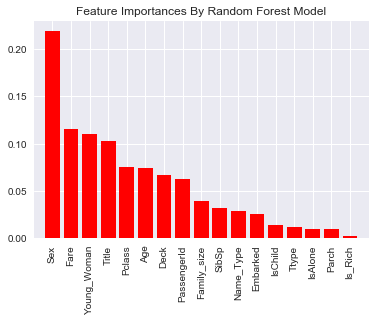

In [2342]:
importances = rf.feature_importances_
std = np.std([rf.feature_importances_ for tree in rf.estimators_],axis=0)

indices = np.argsort(importances)[::-1]

sorted_important_features=[]
for i in indices:
    sorted_important_features.append(predictors[i])
#predictors=titanic.columns

plt.figure()

plt.title("Feature Importances By Random Forest Model")

plt.bar(range(np.size(predictors)), importances[indices],color="r", yerr=std[indices], align="center")

plt.xticks(range(np.size(predictors)), sorted_important_features, rotation='vertical')

plt.xlim([-1, np.size(predictors)]);

# Gradient Boosting

In [2344]:
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier

predictors = ['Age', 'Embarked', 'Fare', 'Parch', 'PassengerId', 'Pclass', 'Sex',
       'SibSp', 'Deck', 'Name_Type', 'Family_size',
       'Title', 'Ttype', 'IsChild', 'IsAlone', 'Young_Woman', 'Is_Rich']

gb = GradientBoostingClassifier(n_estimators=100, subsample=0.9,min_samples_split=6, min_samples_leaf=4,max_depth=3)
gb.fit(New_Train[predictors],New_Train["Survived"])
cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=50)
scores = cross_val_score(gb, New_Train[predictors], New_Train["Survived"], scoring='f1',cv=cv)
print(scores.mean())

0.751350533252


# Adaboost

In [2345]:
from sklearn.ensemble import AdaBoostClassifier
predictors = ['Age', 'Embarked', 'Fare', 'Parch', 'PassengerId', 'Pclass', 'Sex',
       'SibSp', 'Deck', 'Name_Type', 'Family_size',
       'Title', 'Ttype', 'IsChild', 'IsAlone', 'Young_Woman', 'Is_Rich']
adb=AdaBoostClassifier(n_estimators=100,learning_rate=0.1 )
adb.fit(New_Train[predictors],New_Train["Survived"])
cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=50)
scores = cross_val_score(adb, New_Train[predictors], New_Train["Survived"], scoring='f1',cv=cv)
print(scores.mean())

0.769898344044


# Extra Trees Classifier

In [2346]:
from sklearn.ensemble import ExtraTreesClassifier
predictors = ['Age', 'Embarked', 'Fare', 'Parch', 'PassengerId', 'Pclass', 'Sex',
       'SibSp', 'Deck', 'Name_Type', 'Family_size',
       'Title', 'Ttype', 'IsChild', 'IsAlone', 'Young_Woman', 'Is_Rich']
etc=ExtraTreesClassifier(n_estimators=50,min_samples_split=6, min_samples_leaf=4,max_depth=6)
etc.fit(New_Train[predictors],New_Train["Survived"])
cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=50)
scores = cross_val_score(etc, New_Train[predictors], New_Train["Survived"], scoring='f1',cv=cv)
print(scores.mean())

0.768736769063


# Voting ensemble

In [2347]:
predictors = ['Age', 'Embarked', 'Fare', 'Parch', 'PassengerId', 'Pclass', 'Sex',
       'SibSp', 'Deck', 'NameLength', 'Family_size', 'Title',
       'Ttype', 'IsChild', 'IsAlone', 'Young_Woman', 'Is_Rich']

from sklearn.ensemble import VotingClassifier

eclf1 = VotingClassifier(estimators=[('rf', rf), ('adb', adb) , ('gb', gb), ('etc', etc)], voting='soft')

eclf1 = eclf1.fit(New_Train[predictors], New_Train["Survived"])

predictions=eclf1.predict(New_Train[predictors])

In [2348]:
test_predictions = eclf1.predict(X_test[predictors])

test_predictions = test_predictions.astype(int)
submission = pd.DataFrame({
        "PassengerId": X_test["PassengerId"],
        "Survived": test_predictions
    })

submission.to_csv("Py_ensemble_submission14.csv", index=False)